In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,BatchNormalization,Input,Bidirectional,Conv1D,MaxPooling1D,Flatten
from tensorflow.keras import regularizers
import tensorflow as tf
import numpy as np

In [2]:
df = []
for i in range(0,5):
    df.append(pd.read_csv(f'history_log_{i}.csv'))

In [3]:
model = Sequential([
    LSTM(100, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), input_shape=(256,3)),
    Dropout(0.2),

    Dense(2, activation = 'softmax') 
])

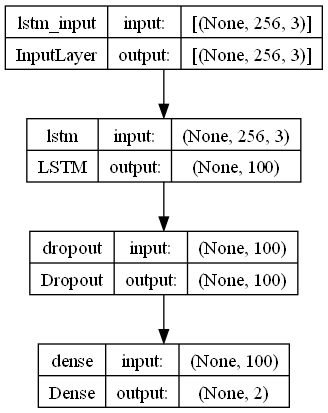

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True)

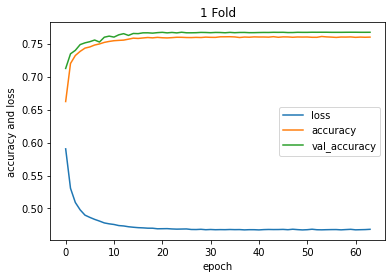

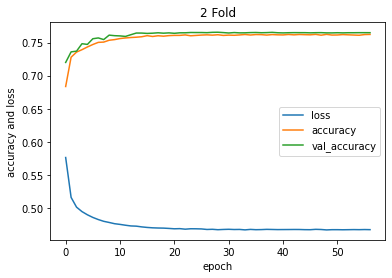

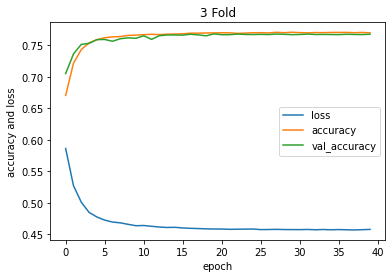

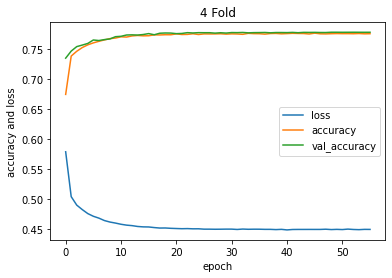

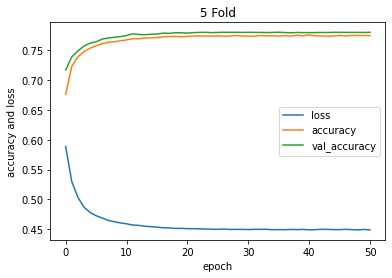

In [5]:
for i in range(len(df)):
    plot = df[i][:].reset_index()[['loss','accuracy','val_accuracy']].plot(title = f'{i+1} Fold',xlabel = 'epoch',ylabel = 'accuracy and loss')
    fig = plot.get_figure()
    fig.savefig(f'{i}_fold.png')

In [6]:
from IPython.display import display
for i in range(len(df)):
    display(df[i][df[i]['epoch']==0])

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.662171,0.590405,0.712341,0.532958


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.683592,0.576302,0.719948,0.529545


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.670677,0.586217,0.705381,0.537962


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.674265,0.578823,0.734558,0.507995


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.676216,0.588705,0.717139,0.538613


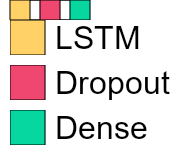

In [7]:
from PIL import ImageFont
import visualkeras
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font,draw_volume=False)  # font is optional!

In [8]:
table = []
for i in range(len(df)):
    display(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
    table.append(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
table = pd.concat(table)

,epoch,accuracy,loss,val_accuracy,val_loss
24,24,0.759548,0.468806,0.767236,0.457857


,epoch,accuracy,loss,val_accuracy,val_loss
28,28,0.761772,0.467251,0.76555,0.457609


,epoch,accuracy,loss,val_accuracy,val_loss
19,19,0.769965,0.458311,0.768403,0.457347


,epoch,accuracy,loss,val_accuracy,val_loss
48,48,0.775234,0.449447,0.777653,0.445949


,epoch,accuracy,loss,val_accuracy,val_loss
26,26,0.773905,0.449928,0.780592,0.438681


In [26]:
import pickle


with open('scores', 'rb') as f:
    unpickler = pickle.Unpickler(f)
    scores = unpickler.load()


with open('evaluations', 'rb') as f:
    unpickler = pickle.Unpickler(f)
    evaluations = unpickler.load()


In [27]:
evaluations

[[0.466313898563385, 0.7583380937576294],
 [0.4714687466621399, 0.749312698841095],
 [0.47670939564704895, 0.763421356678009],
 [0.487804114818573, 0.7431747913360596],
 [0.46487170457839966, 0.7562590837478638]]

In [22]:
scores = np.asarray(scores).T

In [28]:
df3 = pd.DataFrame(scores,columns = ['f1','recalls','precisions'])

ValueError: 3 columns passed, passed data had 5 columns

In [29]:
df3

,f1,recalls,precisions
0,0.758350,0.758395,0.758304
1,0.749304,0.749382,0.749226
2,0.763436,0.763555,0.763318
3,0.743116,0.743212,0.743019
4,0.756232,0.756396,0.756069


In [30]:
np.asarray(evaluations)[:,1]

array([0.75833809, 0.7493127 , 0.76342136, 0.74317479, 0.75625908])

In [31]:
df3

,f1,recalls,precisions
0,0.758350,0.758395,0.758304
1,0.749304,0.749382,0.749226
2,0.763436,0.763555,0.763318
3,0.743116,0.743212,0.743019
4,0.756232,0.756396,0.756069


In [32]:
df2 = table[['accuracy','val_accuracy','epoch']].reset_index()
df2 = pd.concat([df2,df3],axis = 1)
df2['test_accuracy'] = np.asarray(evaluations)[:,1]

In [33]:
s = pd.DataFrame([df2.sum()])/5

In [34]:
df2 = pd.concat([df2,s])

In [35]:
df2 = ((df2*10000)//1)/10000

In [36]:
df2.to_csv('table.csv')

In [37]:
df2

,index,accuracy,val_accuracy,epoch,f1,recalls,precisions,test_accuracy
0,24.0,0.7595,0.7672,24.0,0.7583,0.7583,0.7583,0.7583
1,28.0,0.7617,0.7655,28.0,0.7493,0.7493,0.7492,0.7493
2,19.0,0.7699,0.7684,19.0,0.7634,0.7635,0.7633,0.7634
3,48.0,0.7752,0.7776,48.0,0.7431,0.7432,0.7430,0.7431
4,26.0,0.7739,0.7805,26.0,0.7562,0.7563,0.7560,0.7562
0,29.0,0.7680,0.7718,29.0,0.7540,0.7541,0.7539,0.7541
